# 🚀 Stock Prediction Training UI
## Multi-Company Stock Prediction with LSTM, GRU, and Transformer Models

---

### Features:
- ✅ Train multiple companies (TSLA, AAPL, GOOGL, etc.)
- ✅ Choose models: LSTM, GRU, Transformer, or ALL
- ✅ Custom date ranges
- ✅ Automatic retry with rate limit handling
- ✅ Real-time progress display

---

In [1]:
# Import required libraries
import sys
import os
from datetime import datetime, timedelta

# Add scripts directory to path
scripts_path = os.path.join(os.getcwd(), '..', 'scripts', 'stock_prediction')
sys.path.append(scripts_path)

# Import training module
from train_multi_company import StockModelTrainer

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


---

## 📝 Configuration

Edit the settings below to customize your training:


In [2]:
# ========== TRAINING CONFIGURATION ==========

# Stock Ticker (e.g., 'TSLA', 'AAPL', 'GOOGL')
TICKER = 'TSLA'

# Model Type: 'LSTM', 'GRU', 'TRANSFORMER', or 'ALL'
MODEL_TYPE = 'ALL'

# Date Range
START_DATE = '2018-01-01'
END_DATE = None  # None = today, or specify like '2024-12-31'

# Training Parameters
EPOCHS = 20
BATCH_SIZE = 32
SEQUENCE_LENGTH = 60

# ============================================

# Display configuration
print("\n" + "="*60)
print("TRAINING CONFIGURATION")
print("="*60)
print(f"Ticker:          {TICKER}")
print(f"Model Type:      {MODEL_TYPE}")
print(f"Start Date:      {START_DATE}")
print(f"End Date:        {END_DATE or 'Today'}")
print(f"Epochs:          {EPOCHS}")
print(f"Batch Size:      {BATCH_SIZE}")
print(f"Sequence Length: {SEQUENCE_LENGTH}")
print("="*60 + "\n")


TRAINING CONFIGURATION
Ticker:          TSLA
Model Type:      ALL
Start Date:      2018-01-01
End Date:        Today
Epochs:          20
Batch Size:      32
Sequence Length: 60



---

## 🎯 Option 1: Train Single Company

Run this cell to train the company specified in the configuration above.


In [3]:
import time

# Determine models to train
if MODEL_TYPE == 'ALL':
    models = ['LSTM', 'GRU', 'TRANSFORMER']
else:
    models = [MODEL_TYPE]

print(f"\n{'#'*60}")
print(f"TRAINING {TICKER}")
print(f"Models: {', '.join(models)}")
print(f"{'#'*60}\n")

results = {}
for i, model in enumerate(models):
    # Add delay between models to avoid rate limiting
    if i > 0:
        print(f"\n⏳ Waiting 3 seconds before training next model...\n")
        time.sleep(3)
    
    print(f"\n{'='*60}")
    print(f"Starting {model} Model Training")
    print(f"{'='*60}\n")
    
    trainer = StockModelTrainer(
        ticker=TICKER,
        model_type=model,
        start_date=START_DATE,
        end_date=END_DATE,
        sequence_length=SEQUENCE_LENGTH
    )
    
    success = trainer.run(epochs=EPOCHS, batch_size=BATCH_SIZE)
    results[model] = success

# Print summary
print(f"\n{'#'*60}")
print(f"TRAINING SUMMARY FOR {TICKER}")
print(f"{'#'*60}")
for model, success in results.items():
    status = "✅ SUCCESS" if success else "❌ FAILED"
    print(f"{model}: {status}")
print(f"{'#'*60}\n")


############################################################
TRAINING TSLA
Models: LSTM, GRU, TRANSFORMER
############################################################


Starting LSTM Model Training


Period: 2018-01-01 to 2026-01-12

🔄 Attempting to download data (attempt 1/5)...
yfinance: download(show_errors=False) argument is deprecated and will be removed in future version. Do this instead to suppress error messages: logging.getLogger('yfinance').setLevel(logging.CRITICAL)
⚠️  No data returned for TSLA
⏳ Waiting 5 seconds before retry (attempt 2/5)...
🔄 Attempting to download data (attempt 2/5)...
⚠️  No data returned for TSLA
⏳ Waiting 10 seconds before retry (attempt 3/5)...
🔄 Attempting to download data (attempt 3/5)...
⚠️  No data returned for TSLA
⏳ Waiting 20 seconds before retry (attempt 4/5)...
🔄 Attempting to download data (attempt 4/5)...
⚠️  No data returned for TSLA
⏳ Waiting 40 seconds before retry (attempt 5/5)...
🔄 Attempting to download data (attempt 5/5)...
⚠️  No

---

## 🚀 Option 2: Train Multiple Companies

Train multiple companies at once. Edit the `TICKERS` list below.


In [4]:
import time

# ========== MULTI-COMPANY CONFIGURATION ==========

# List of tickers to train
TICKERS = ['TSLA', 'AAPL', 'GOOGL', 'MSFT', 'NVDA']

# Model Type: 'LSTM', 'GRU', 'TRANSFORMER', or 'ALL'
MULTI_MODEL_TYPE = 'ALL'

# Use same date range and parameters from configuration above

# =================================================

print(f"\n{'#'*60}")
print(f"MULTI-COMPANY TRAINING")
print(f"Companies: {', '.join(TICKERS)}")
print(f"Model Type: {MULTI_MODEL_TYPE}")
print(f"{'#'*60}\n")

# Determine models
if MULTI_MODEL_TYPE == 'ALL':
    models = ['LSTM', 'GRU', 'TRANSFORMER']
else:
    models = [MULTI_MODEL_TYPE]

all_results = {}

for ticker_idx, ticker in enumerate(TICKERS):
    print(f"\n{'='*60}")
    print(f"[{ticker_idx + 1}/{len(TICKERS)}] Training {ticker}")
    print(f"{'='*60}\n")
    
    ticker_results = {}
    
    for model_idx, model in enumerate(models):
        # Add delay between models
        if model_idx > 0 or ticker_idx > 0:
            print(f"\n⏳ Waiting 5 seconds before next training to avoid rate limiting...\n")
            time.sleep(5)
        
        print(f"\n--- Training {ticker} with {model} ---\n")
        
        trainer = StockModelTrainer(
            ticker=ticker,
            model_type=model,
            start_date=START_DATE,
            end_date=END_DATE,
            sequence_length=SEQUENCE_LENGTH
        )
        
        success = trainer.run(epochs=EPOCHS, batch_size=BATCH_SIZE)
        ticker_results[model] = success
    
    all_results[ticker] = ticker_results

# Print final summary
print(f"\n{'#'*60}")
print(f"FINAL TRAINING SUMMARY")
print(f"{'#'*60}\n")

for ticker, results in all_results.items():
    print(f"\n{ticker}:")
    for model, success in results.items():
        status = "✅ SUCCESS" if success else "❌ FAILED"
        print(f"  {model}: {status}")

print(f"\n{'#'*60}\n")


############################################################
MULTI-COMPANY TRAINING
Companies: TSLA, AAPL, GOOGL, MSFT, NVDA
Model Type: ALL
############################################################


[1/5] Training TSLA


--- Training TSLA with LSTM ---


Period: 2018-01-01 to 2026-01-12

🔄 Attempting to download data (attempt 1/5)...
⚠️  No data returned for TSLA
⏳ Waiting 5 seconds before retry (attempt 2/5)...
🔄 Attempting to download data (attempt 2/5)...
⚠️  No data returned for TSLA
⏳ Waiting 10 seconds before retry (attempt 3/5)...
🔄 Attempting to download data (attempt 3/5)...
⚠️  No data returned for TSLA
⏳ Waiting 20 seconds before retry (attempt 4/5)...
🔄 Attempting to download data (attempt 4/5)...
⚠️  No data returned for TSLA
⏳ Waiting 40 seconds before retry (attempt 5/5)...
🔄 Attempting to download data (attempt 5/5)...
⚠️  No data returned for TSLA
⚠️  Error on attempt 5: No data found for ticker TSLA after 5 attempts
❌ Failed after 5 attempts: No data found for t

---

## ⚡ Option 3: Quick Test Training

Fast training for testing (uses only 1 month of data and 5 epochs).


In [5]:
# Quick test configuration
TEST_TICKER = 'AAPL'
TEST_MODEL = 'LSTM'
TEST_START = (datetime.now() - timedelta(days=60)).strftime('%Y-%m-%d')
TEST_END = datetime.now().strftime('%Y-%m-%d')
TEST_EPOCHS = 5

print(f"\n{'='*60}")
print("QUICK TEST TRAINING")
print(f"{'='*60}")
print(f"Ticker: {TEST_TICKER}")
print(f"Model: {TEST_MODEL}")
print(f"Period: {TEST_START} to {TEST_END}")
print(f"Epochs: {TEST_EPOCHS}")
print(f"{'='*60}\n")

trainer = StockModelTrainer(
    ticker=TEST_TICKER,
    model_type=TEST_MODEL,
    start_date=TEST_START,
    end_date=TEST_END,
    sequence_length=30  # Shorter sequence for quick test
)

success = trainer.run(epochs=TEST_EPOCHS, batch_size=16)

if success:
    print(f"\n✅ Quick test completed successfully!")
else:
    print(f"\n❌ Quick test failed. Check the output above for errors.")


QUICK TEST TRAINING
Ticker: AAPL
Model: LSTM
Period: 2025-11-13 to 2026-01-12
Epochs: 5


Period: 2025-11-13 to 2026-01-12

🔄 Attempting to download data (attempt 1/5)...
⚠️  No data returned for AAPL
⏳ Waiting 5 seconds before retry (attempt 2/5)...
🔄 Attempting to download data (attempt 2/5)...
⚠️  No data returned for AAPL
⏳ Waiting 10 seconds before retry (attempt 3/5)...
🔄 Attempting to download data (attempt 3/5)...
⚠️  No data returned for AAPL
⏳ Waiting 20 seconds before retry (attempt 4/5)...
🔄 Attempting to download data (attempt 4/5)...
⚠️  No data returned for AAPL
⏳ Waiting 40 seconds before retry (attempt 5/5)...
🔄 Attempting to download data (attempt 5/5)...
⚠️  No data returned for AAPL
⚠️  Error on attempt 5: No data found for ticker AAPL after 5 attempts
❌ Failed after 5 attempts: No data found for ticker AAPL after 5 attempts

❌ Quick test failed. Check the output above for errors.


---

## 📊 View Training Results

View metrics and plots for trained models.



RESULTS FOR TSLA


GRU Model:
  RMSE: $18.07
  MAE:  $13.60
  MAPE: 4.18%
  Trained: 2026-01-12 11:08:30
  Period: 2018-01-01 to 2026-01-12

LSTM Model:
  RMSE: $26.16
  MAE:  $20.15
  MAPE: 6.10%
  Trained: 2026-01-12 11:08:10
  Period: 2018-01-01 to 2026-01-12

TRANSFORMER Model:
  RMSE: $196.80
  MAE:  $178.26
  MAPE: 51.13%
  Trained: 2026-01-12 11:08:45
  Period: 2018-01-01 to 2026-01-12

PREDICTION PLOTS


GRU Model Predictions:


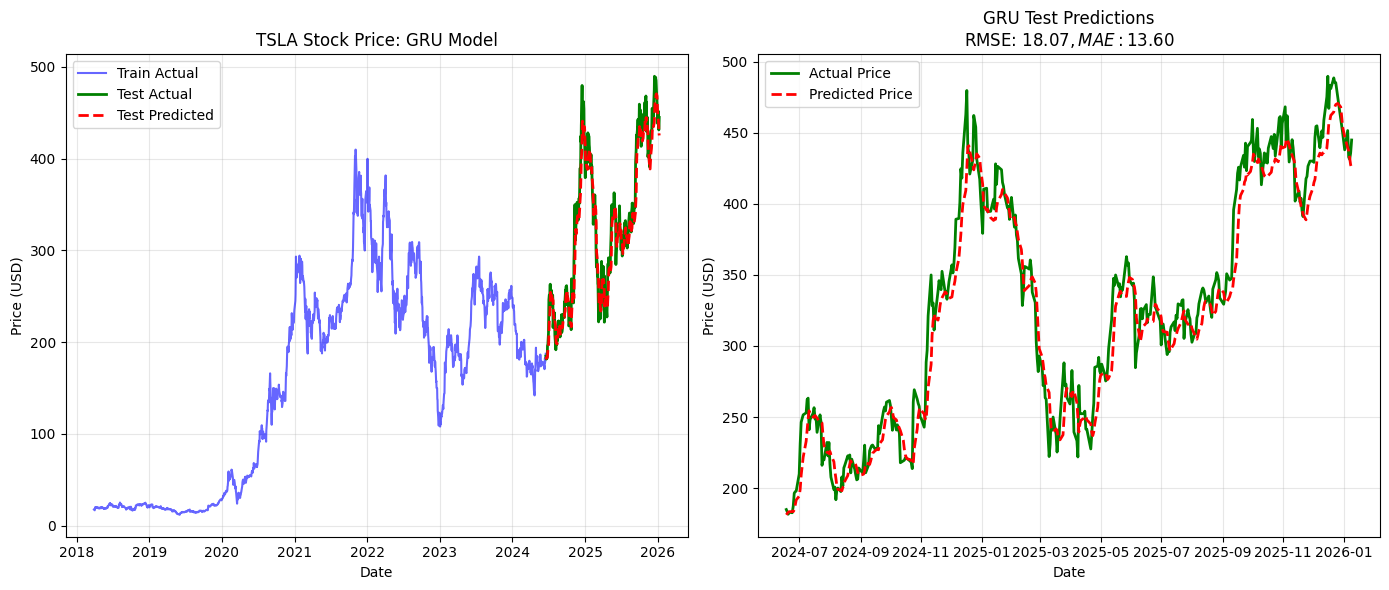




LSTM Model Predictions:


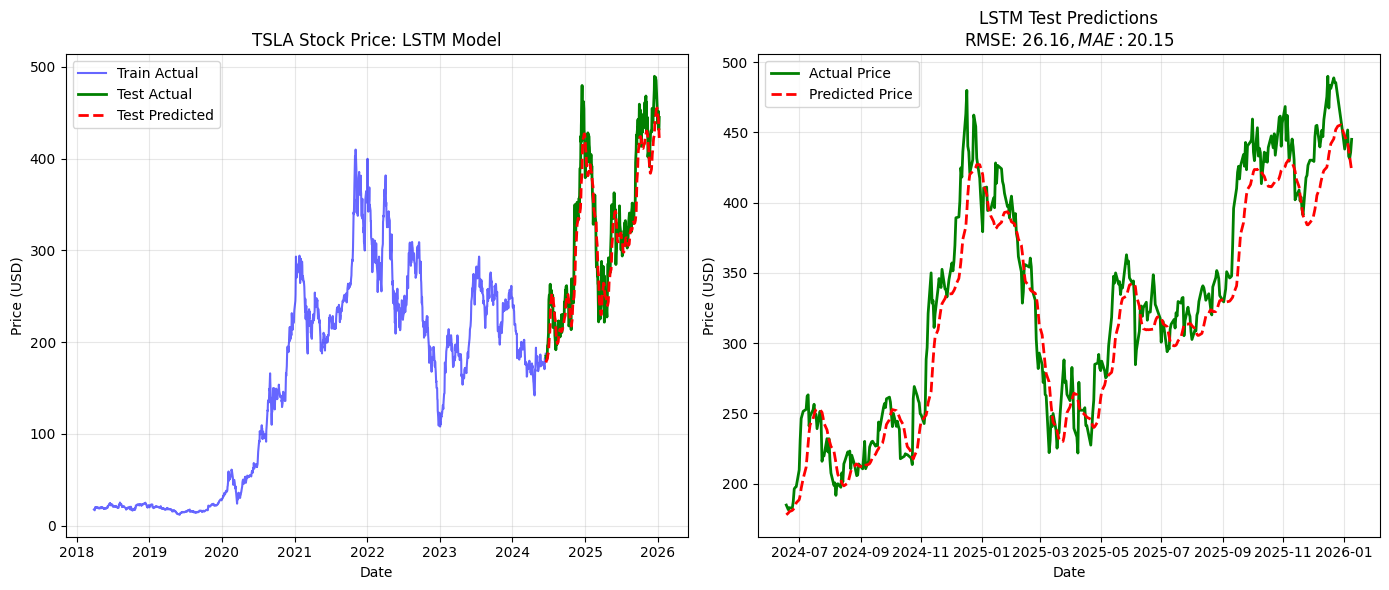




TRANSFORMER Model Predictions:


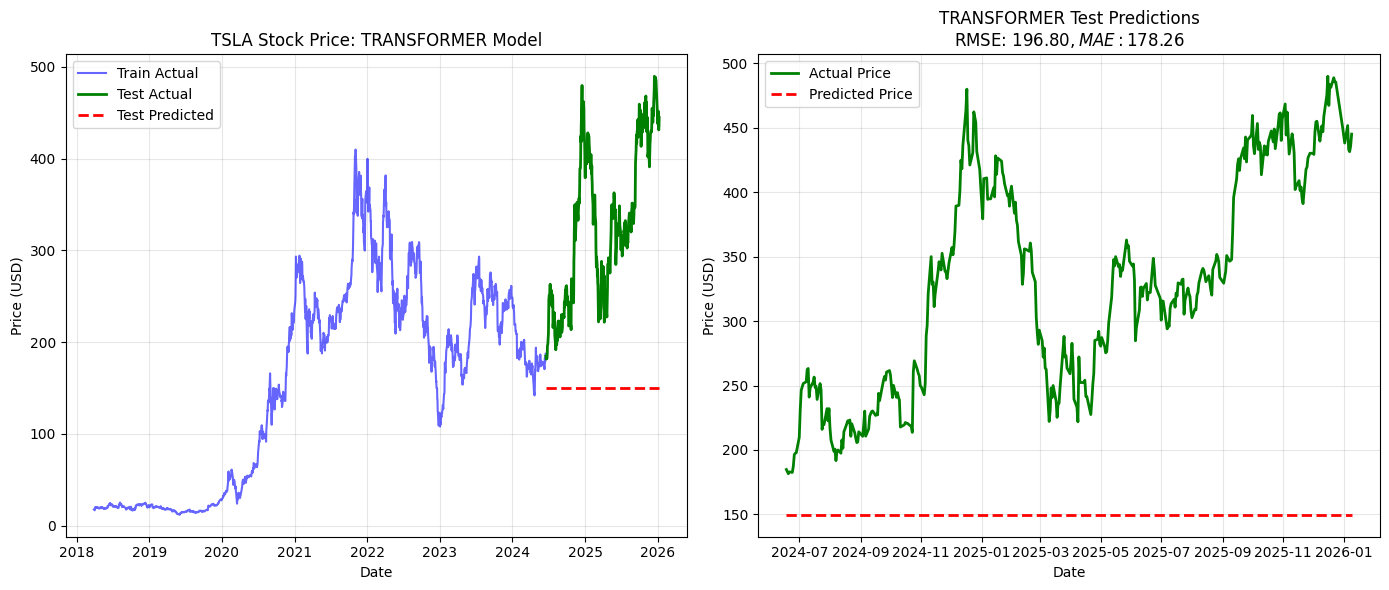

In [6]:
import pickle
from IPython.display import Image, display
import glob

# Specify ticker to view results for
VIEW_TICKER = TICKER  # Use the ticker from configuration

models_dir = os.path.join('..', 'models', VIEW_TICKER)

print(f"\n{'='*60}")
print(f"RESULTS FOR {VIEW_TICKER}")
print(f"{'='*60}\n")

if not os.path.exists(models_dir):
    print(f"❌ No models found for {VIEW_TICKER}")
    print(f"Train the models first using the cells above.")
else:
    # Find all metrics files
    metrics_files = glob.glob(os.path.join(models_dir, '*_metrics.pkl'))
    
    if not metrics_files:
        print(f"❌ No metrics found for {VIEW_TICKER}")
    else:
        # Display metrics for each model
        for metrics_file in sorted(metrics_files):
            with open(metrics_file, 'rb') as f:
                metrics = pickle.load(f)
            
            model_name = metrics['model']
            print(f"\n{model_name} Model:")
            print(f"  RMSE: ${metrics['rmse']:.2f}")
            print(f"  MAE:  ${metrics['mae']:.2f}")
            print(f"  MAPE: {metrics['mape']:.2f}%")
            print(f"  Trained: {metrics['train_date']}")
            print(f"  Period: {metrics['data_period']}")
        
        # Display prediction plots
        print(f"\n{'='*60}")
        print("PREDICTION PLOTS")
        print(f"{'='*60}\n")
        
        plot_files = glob.glob(os.path.join(models_dir, '*_prediction.png'))
        
        for plot_file in sorted(plot_files):
            model_name = os.path.basename(plot_file).split('_')[0].upper()
            print(f"\n{model_name} Model Predictions:")
            display(Image(filename=plot_file))
            print("\n")

---

## 📈 Compare All Models

Compare performance across all trained models.


In [7]:
import pickle
import glob
import pandas as pd

# Specify ticker to compare
COMPARE_TICKER = TICKER

models_dir = os.path.join('..', 'models', COMPARE_TICKER)

print(f"\n{'='*60}")
print(f"MODEL COMPARISON FOR {COMPARE_TICKER}")
print(f"{'='*60}\n")

if not os.path.exists(models_dir):
    print(f"❌ No models found for {COMPARE_TICKER}")
else:
    metrics_files = glob.glob(os.path.join(models_dir, '*_metrics.pkl'))
    
    if not metrics_files:
        print(f"❌ No metrics found for {COMPARE_TICKER}")
    else:
        # Load all metrics
        comparison_data = []
        for metrics_file in metrics_files:
            with open(metrics_file, 'rb') as f:
                metrics = pickle.load(f)
            comparison_data.append({
                'Model': metrics['model'],
                'RMSE': f"${metrics['rmse']:.2f}",
                'MAE': f"${metrics['mae']:.2f}",
                'MAPE': f"{metrics['mape']:.2f}%",
                'Train Samples': metrics['samples']['train'],
                'Test Samples': metrics['samples']['test']
            })
        
        # Create DataFrame
        df_comparison = pd.DataFrame(comparison_data)
        df_comparison = df_comparison.sort_values('Model')
        
        print(df_comparison.to_string(index=False))
        print(f"\n{'='*60}\n")
        
        # Find best model
        best_idx = df_comparison['MAPE'].str.replace('%', '').astype(float).idxmin()
        best_model = df_comparison.loc[best_idx, 'Model']
        best_mape = df_comparison.loc[best_idx, 'MAPE']
        
        print(f"🏆 Best Model: {best_model} (MAPE: {best_mape})")
        print()


MODEL COMPARISON FOR TSLA

      Model    RMSE     MAE   MAPE  Train Samples  Test Samples
        GRU  $18.07  $13.60  4.18%           1565           392
       LSTM  $26.16  $20.15  6.10%           1565           392
TRANSFORMER $196.80 $178.26 51.13%           1565           392


🏆 Best Model: GRU (MAPE: 4.18%)



---

## 📁 List All Trained Models

View all companies and models that have been trained.


In [8]:
import os
import glob

models_root = os.path.join('..', 'models')

print(f"\n{'='*60}")
print("ALL TRAINED MODELS")
print(f"{'='*60}\n")

if not os.path.exists(models_root):
    print("❌ No models directory found")
else:
    # Get all company directories
    company_dirs = [d for d in os.listdir(models_root) 
                   if os.path.isdir(os.path.join(models_root, d))]
    
    if not company_dirs:
        print("❌ No trained models found")
    else:
        for company in sorted(company_dirs):
            company_path = os.path.join(models_root, company)
            model_files = glob.glob(os.path.join(company_path, '*_model.h5'))
            
            if model_files:
                models = [os.path.basename(f).split('_')[0].upper() 
                         for f in model_files]
                print(f"📊 {company}: {', '.join(sorted(set(models)))}")
        
        print(f"\n{'='*60}\n")


ALL TRAINED MODELS

📊 AAPL: GRU, LSTM, TRANSFORMER
📊 TSLA: GRU, LSTM, TRANSFORMER




---

## 💡 Tips

### Avoiding Rate Limits:
- If you get 429 errors, wait 10-15 minutes before trying again
- The script includes automatic retry with exponential backoff
- Train one company at a time if you continue to hit rate limits

### Quick Commands:
- **Single company**: Edit configuration → Run "Train Single Company" cell
- **Multiple companies**: Edit TICKERS list → Run "Train Multiple Companies" cell
- **Quick test**: Run "Quick Test Training" cell
- **View results**: Run "View Training Results" cell

### Model Files Location:
```
../models/
├── TSLA/
│   ├── lstm_tsla_model.h5
│   ├── lstm_tsla_scaler.pkl
│   ├── lstm_tsla_metrics.pkl
│   └── lstm_tsla_prediction.png
├── AAPL/
└── ...
```

---

## 📚 Next Steps

1. ✅ Train your models using the cells above
2. ✅ View results and compare models
3. ✅ Use trained models for predictions (see prediction notebooks)
4. ✅ Set up Airflow automation for scheduled training

---

**Happy Trading!** 📈💰
